# Lok Sabha Election Data Analysis and Visualization

1. Youngest Candidate who participated in Lok Sabha Election?
2. Candidate with Highest number of Criminal Cases.
3. Parties with total number of criminal cases.
4. Education of each candidate. ? Most common education level?
5. Different Constituency and Criminal cases count in 2014 Elections.

# Import Required Libraries 

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Load Dataset


In [10]:
candidates_2004=pd.read_csv("LokSabha2004.csv")
candidates_2009=pd.read_csv("LokSabha2009.csv")
candidates_2014=pd.read_csv("LokSabha2014.csv")
candidates_2019=pd.read_csv("LokSabha2019.csv")

# Data contains:

In [ ]:
Candidate - Name of the Candidate. 
Party - Policatical Party.
Criminal Cases -Criminal Cases against candidate. 
Education - Education of candidate.
Age - Age of candidate. 
Total Assets - Total assets of candidate. 
Constituency - Name of constituency from candidate stand in election. 
Liabilities - Total Liabilities of candidate.
Winner - Does candidate won in election that year? (0 - No, 1- Yes)
Gender - Gender of candidate. (M-Male, F-Female)

### We have data file for each year. So let merge them in one file before doing that add a year column.

In [11]:
candidates_2004['Year']=2004
candidates_2009['Year']=2009
candidates_2014['Year']=2014
candidates_2019['Year']=2019

In [12]:
candidates_2014.head()

,Candidate,Party,Criminal Cases,Education,Age,Total Assets,Constituency,Liabilities,Winner,Gender,Year
0,Bishnu Pada Ray,BJP,1,Graduate,64,5658980.0,ANDAMAN AND NICOBAR ISLANDS,175115,0.0,M,2014
1,A Pandian,AIFB,0,12th Pass,41,859410.0,ANDAMAN AND NICOBAR ISLANDS,350000,0.0,M,2014
2,Anita Mondal,AITC,1,Graduate,48,5471073.0,ANDAMAN AND NICOBAR ISLANDS,6000,0.0,M,2014
3,C G Saji Kumar,IND,0,12th Pass,41,50000.0,ANDAMAN AND NICOBAR ISLANDS,0,0.0,M,2014
4,Gaur Chandra Majumder,BSP,0,Graduate,47,3192819.0,ANDAMAN AND NICOBAR ISLANDS,688689,0.0,M,2014


### Now we have year column in each data frame. Let's merge them in one data frame using `pd.concat` method

In [13]:
candidates = pd.concat([candidates_2009, candidates_2004, candidates_2014, candidates_2019])

In [14]:
candidates.head()

,Candidate,Party,Criminal Cases,Education,Age,Total Assets,Constituency,Liabilities,Winner,Gender,Year
0,Shri Bishnu Pada Ray,BJP,1,Graduate,59,1241034.0,Andaman & Nicobar Islands,0,0.0,M,2009
1,Shri P. R. Ganeshan,RJD,0,Not Given,71,329563.0,Andaman & Nicobar Islands,0,0.0,M,2009
2,Shri Pradeep Kumar Ekka,JDP,0,Others,37,410000.0,Andaman & Nicobar Islands,0,0.0,M,2009
3,Shri T. Ali,IND,0,12th Pass,37,445957.0,Andaman & Nicobar Islands,296000,0.0,M,2009
4,Shri Tapan Kumar Bepari,CPM,0,Post Graduate,52,3986000.0,Andaman & Nicobar Islands,0,0.0,M,2009


### Statistics of Data

In [16]:
candidates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28014 entries, 0 to 7967
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Candidate       28014 non-null  object 
 1   Party           28014 non-null  object 
 2   Criminal Cases  28014 non-null  int64  
 3   Education       28014 non-null  object 
 4   Age             28014 non-null  int64  
 5   Total Assets    27199 non-null  float64
 6   Constituency    28014 non-null  object 
 7   Liabilities     28014 non-null  int64  
 8   Winner          28014 non-null  float64
 9   Gender          28014 non-null  object 
 10  Year            28014 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 2.6+ MB


In [17]:
candidates.describe()

,Criminal Cases,Age,Total Assets,Liabilities,Winner,Year
count,28014.000000,28014.000000,2.719900e+04,2.801400e+04,28014.000000,28014.000000
mean,0.483901,46.487078,3.433395e+07,3.086273e+06,0.037660,2012.708503
std,4.164205,12.546241,5.572976e+08,3.400576e+07,0.190375,5.050962
min,0.000000,0.000000,2.000000e+00,0.000000e+00,0.000000,2004.000000
25%,0.000000,37.000000,3.302960e+05,0.000000e+00,0.000000,2009.000000
50%,0.000000,46.000000,1.851000e+06,0.000000e+00,0.000000,2014.000000
75%,0.000000,55.000000,8.663450e+06,2.700000e+05,0.000000,2019.000000
max,382.000000,94.000000,7.710296e+10,2.218003e+09,1.000000,2019.000000


In [18]:
candidates.shape

(28014, 11)

# Year wise Data Analysis and Visualization

### 1.Youngest Candidate who participated in LokSabha Election?

#### Some entries have value lesser than 18 so I am ignoring those value because that values are false.


In [20]:
candidate_age_2004 = candidates_2004[candidates_2004['Age'] > 18]
candidate_age_2009 = candidates_2009[candidates_2009['Age'] > 18]
candidate_age_2014 = candidates_2014[candidates_2014['Age'] > 18]
candidate_age_2019 = candidates_2019[candidates_2019['Age'] > 18]


In [21]:
candidate_age_2004['Age'].min()


25

In [22]:
candidate_age_2004[candidate_age_2004['Age'] == candidate_age_2004['Age'].min() ].head()


,Candidate,Party,Criminal Cases,Education,Age,Total Assets,Constituency,Liabilities,Winner,Gender,Year
393,Om Prakash Paswan,AD,0,Not Given,25,15000.0,Araria,9000,0,M,2004
420,Sarjoon Paswan,IND,0,Not Given,25,185000.0,Aurangabad,0,0,M,2004
550,Shakti Raj,BSP,0,Graduate,25,94500.0,Gaya,0,0,M,2004
556,Monika Tiwari,BED,0,Post Graduate,25,41000.0,Gopalganj,0,0,F,2004
569,Uttam Choudhary Unnat,JD(S),0,Post Graduate,25,20000.0,Hajipur,0,0,M,2004


#### In 2004's Lok Sabha Election,yougest candidate age was 25 years

In [23]:
candidate_age_2009['Age'].min()

25

In [24]:
candidate_age_2009[candidate_age_2009['Age'] == candidate_age_2009['Age'].min()].head()

,Candidate,Party,Criminal Cases,Education,Age,Total Assets,Constituency,Liabilities,Winner,Gender,Year
570,Taba Taku,LB,0,Graduate,25,10000.0,Arunachal West,0,0,M,2009
887,Binita Baitha,IND,0,Graduate,25,80000.0,Gopalganj,0,0,F,2009
1017,Mohammad Nissar Alam,JMM,0,8th Pass,25,206500.0,Kishanganj,45000,0,M,2009
1128,Kumar Rajesh,IND,0,Graduate,25,2.0,Nalanda,0,0,M,2009
1174,Durgesh Nandan Singh,IND,0,Graduate Professional,25,23000.0,Pataliputra,0,0,M,2009


#### In 2009's Lok Sabha Election,yougest candidate age was 25 years

In [25]:
candidate_age_2014['Age'].min()

21

In [26]:
candidate_age_2014[candidate_age_2014['Age'] == candidate_age_2014['Age'].min()].head()

,Candidate,Party,Criminal Cases,Education,Age,Total Assets,Constituency,Liabilities,Winner,Gender,Year
7242,Ravikant Yadav,IND,0,Graduate,21,1100000.0,JAUNPUR,0,0.0,M,2014


#### In 2014's Lok Sabha Election,yougest candidate age was 21 years

In [27]:
candidate_age_2019['Age'].min()

24

In [28]:
candidate_age_2019[candidate_age_2019['Age'] == candidate_age_2019['Age'].min()].head()

,Candidate,Party,Criminal Cases,Education,Age,Total Assets,Constituency,Liabilities,Winner,Gender,Year
5774,Ponnuthai G,IND,0,12th Pass,24,118000.0,Tenkasi,0,0.0,F,2019


#### In 2019's Lok Sabha Election,yougest candidate age was 24 years

## Ravikant Yadav is youngest candidate, 21 Age who participated in 2014 lok sabha election.

C:\Users\admin\AppData\Local\Temp\ipykernel_11232\1554418937.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=candidate_age_2004['Age'].sort_values(),


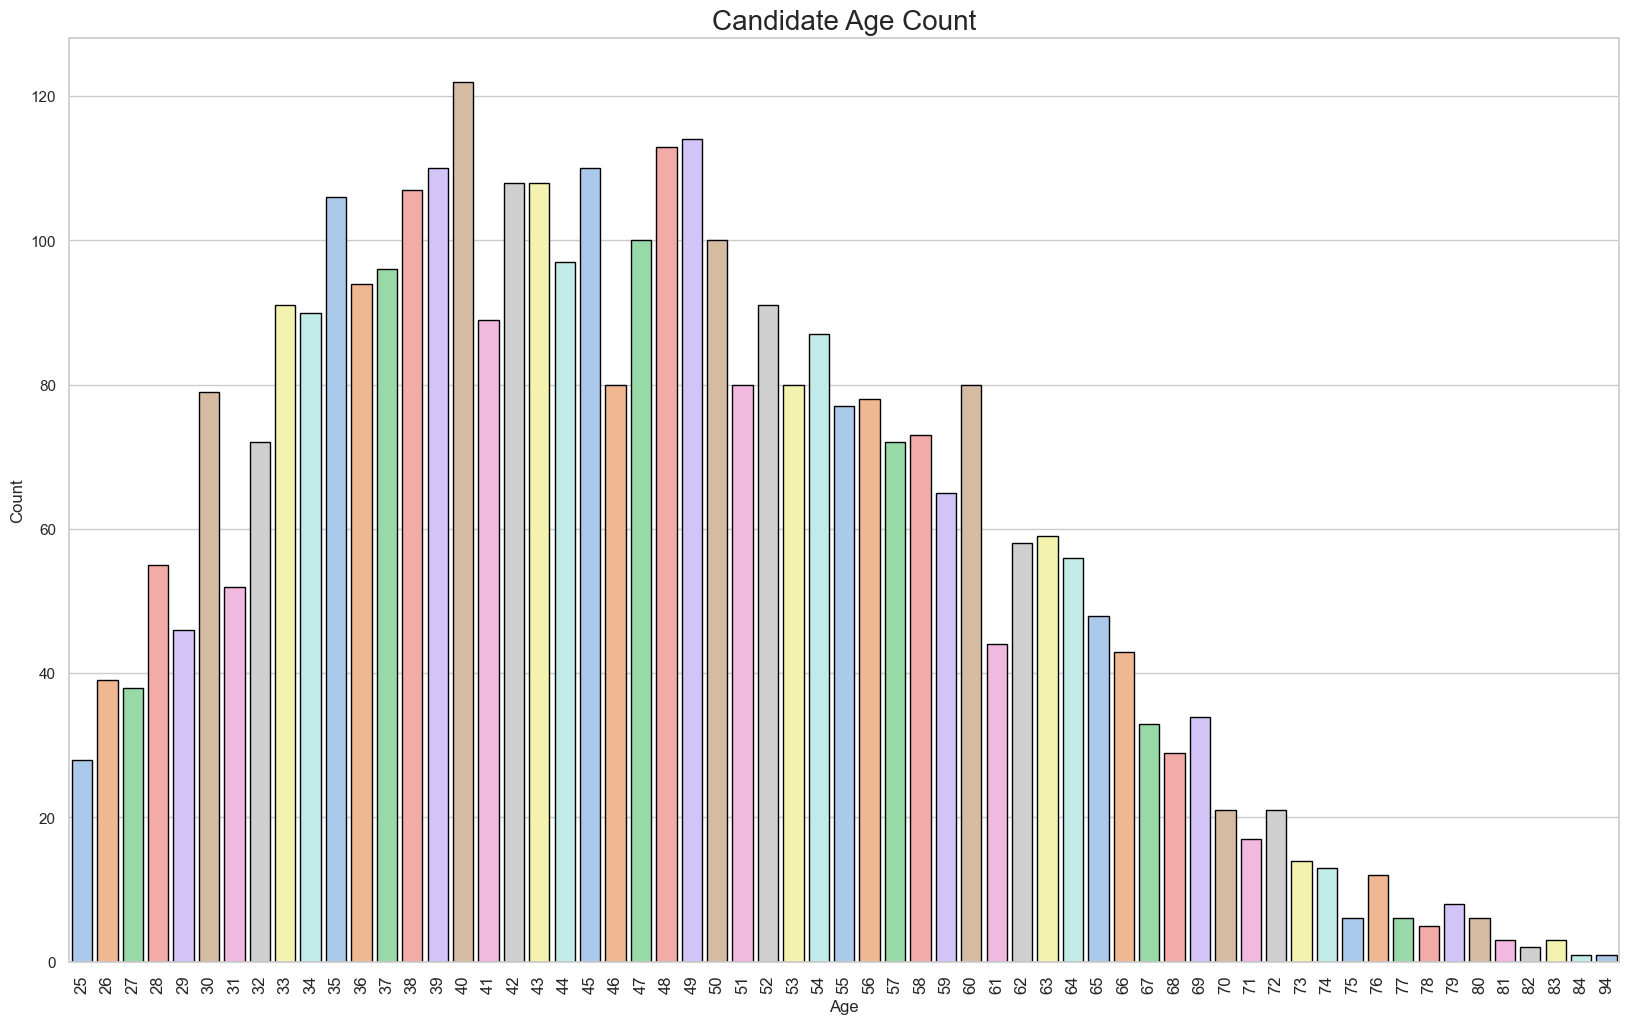

In [63]:
plt.figure(figsize=(20,12))                                      # Creates a large figure
sns.countplot(x=candidate_age_2004['Age'].sort_values(),
palette="pastel", edgecolor=(0, 0, 0), hue=None)
plt.title("Candidate Age Count", fontsize=20)                    # Adds title 
plt.xlabel('Age')                                                # Label for x-axis
plt.ylabel('Count')                                              # Label for y-axis
plt.xticks(fontsize=12, rotation=90)                             # Rotates x-axis tick labels vertically
plt.show()                                                       # Displays the plot 


C:\Users\admin\AppData\Local\Temp\ipykernel_11232\2585123182.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=candidate_age_2009['Age'].sort_values(),


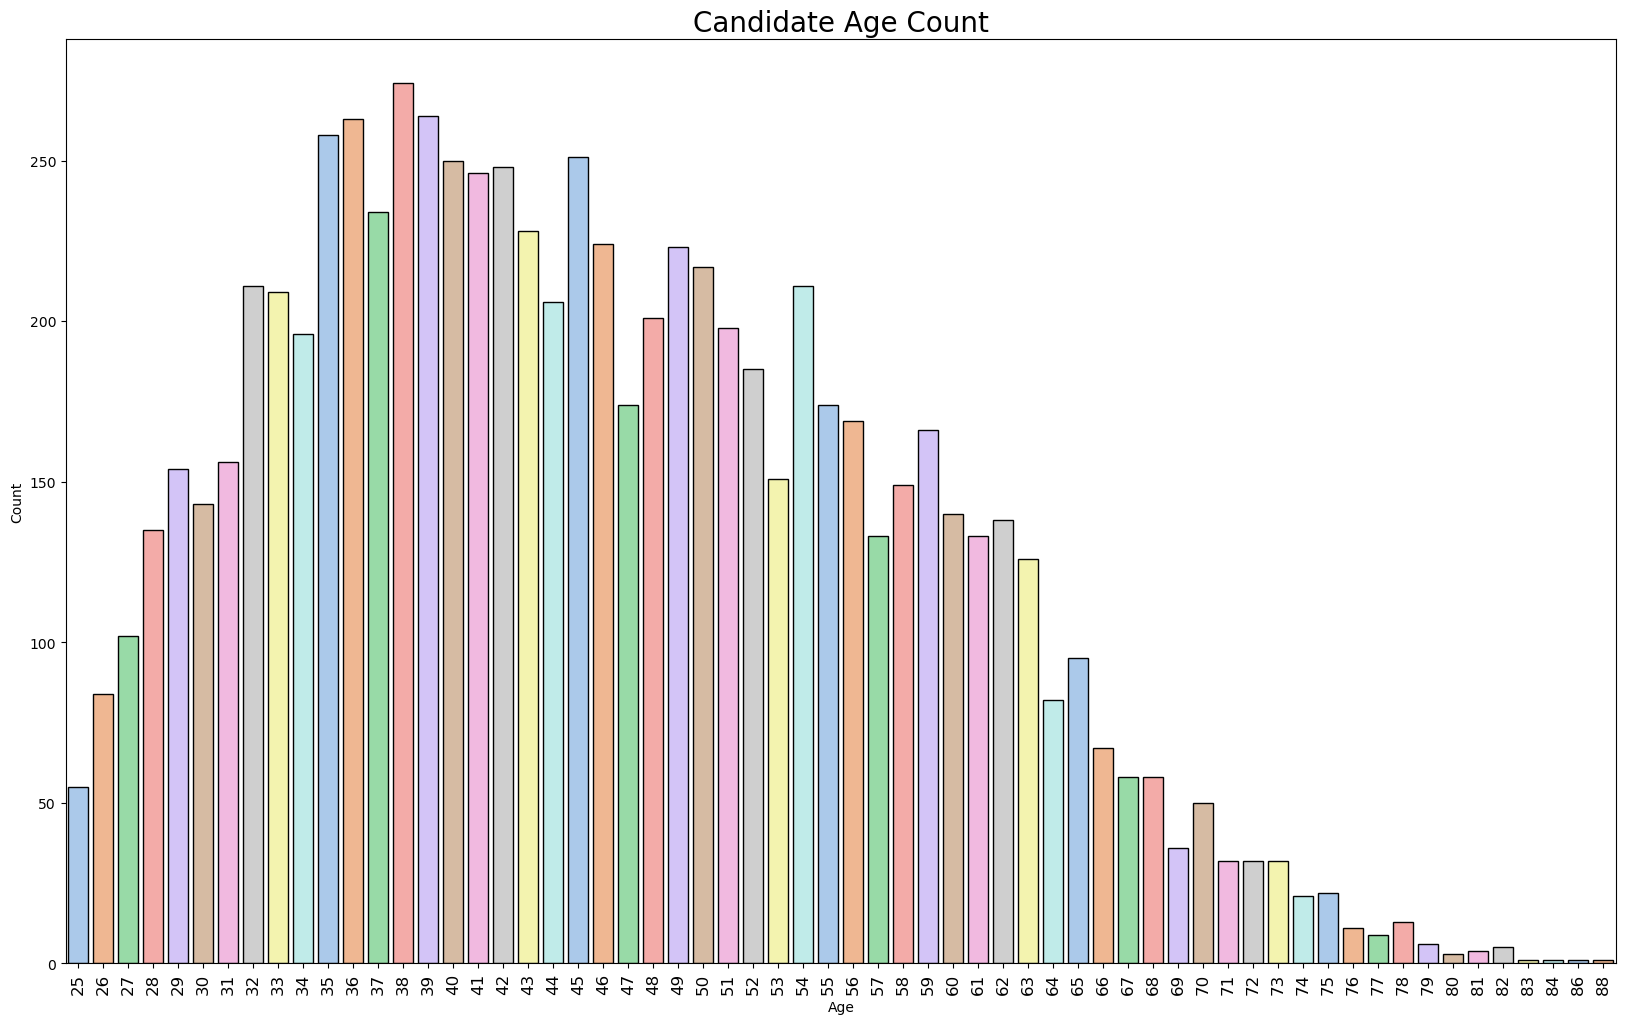

In [30]:
plt.figure(figsize=(20,12))                                       # Creates a large figure
sns.countplot(x=candidate_age_2009['Age'].sort_values(),
palette="pastel", edgecolor=(0, 0, 0), hue=None)
plt.title("Candidate Age Count", fontsize=20)                     # Adds title with fontsize
plt.xlabel('Age')                                                 # Label for x-axis
plt.ylabel('Count')                                               # Label for y-axis  
plt.xticks(fontsize=12, rotation=90)                              # Rotates x-axis tick labels vertically
plt.show()                                                        # Displays the plot

C:\Users\admin\AppData\Local\Temp\ipykernel_11232\2663316121.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=candidate_age_2014['Age'].sort_values(),


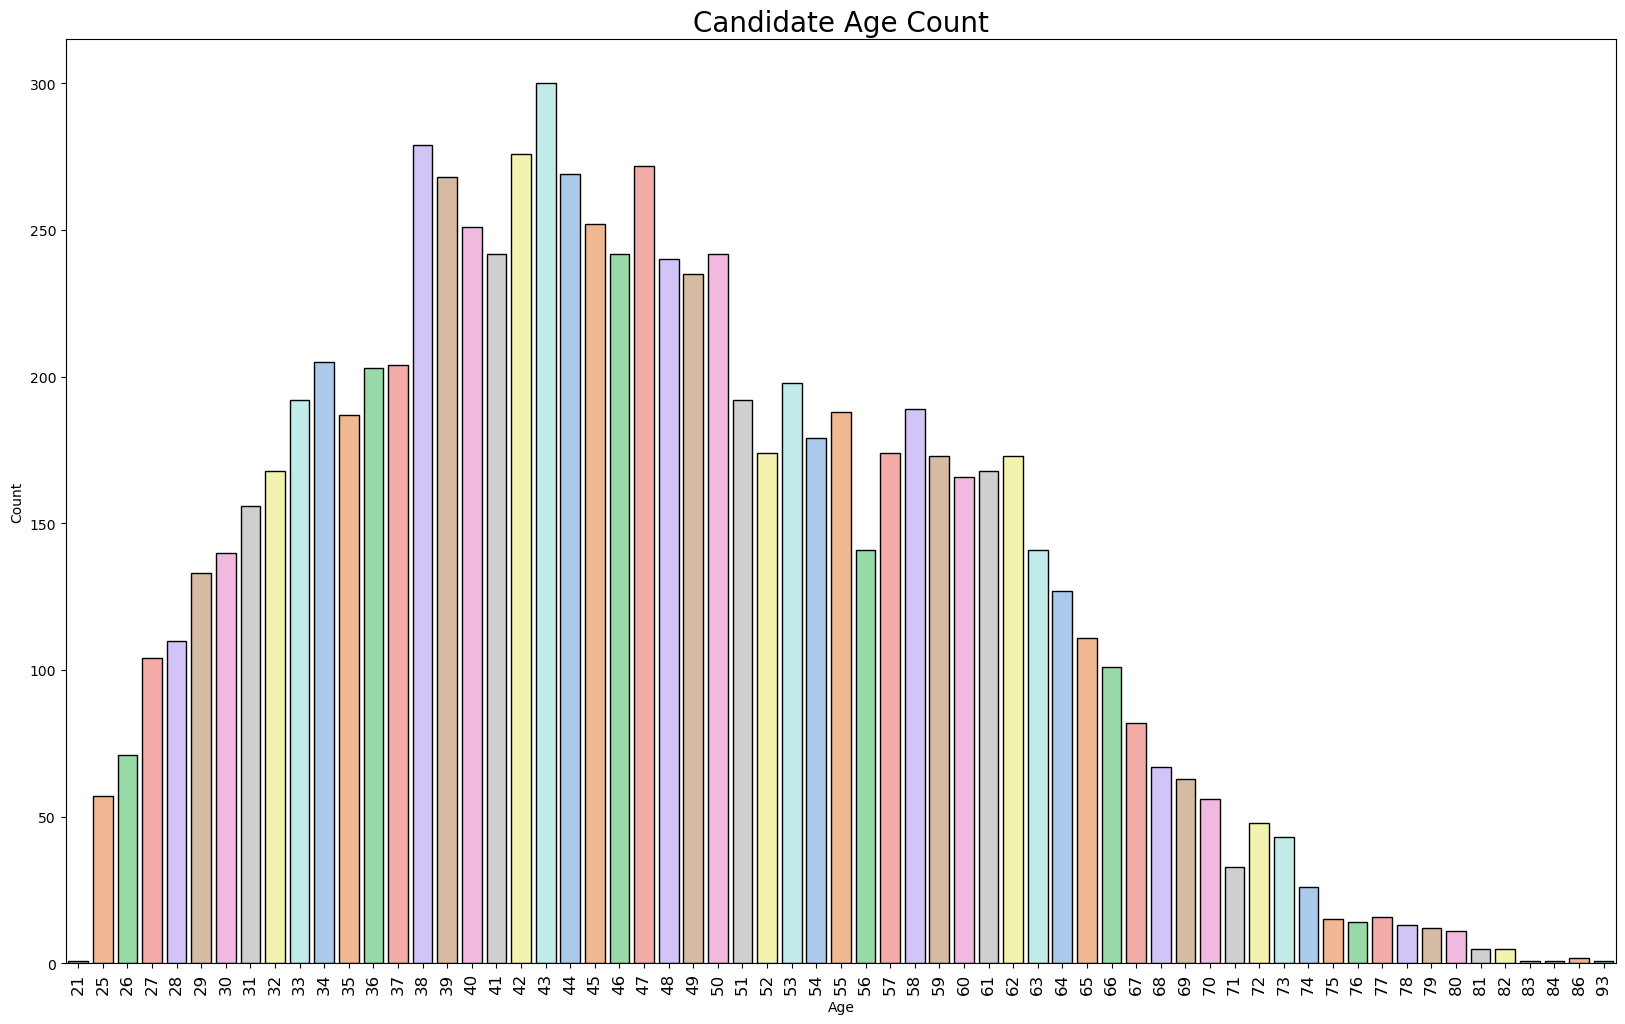

In [31]:
plt.figure(figsize=(20,12))                                       # Large figure for clear visualization
sns.countplot(x=candidate_age_2014['Age'].sort_values(),
palette="pastel", edgecolor=(0, 0, 0), hue=None)
plt.title("Candidate Age Count", fontsize=20)                    # Plot title
plt.xlabel('Age')                                                # x-axis label
plt.ylabel('Count')                                              # y-axis label
plt.xticks(fontsize=12, rotation=90)                             # Rotated x-axis labels for clarity
plt.show()                                                       # Displays the plot

C:\Users\admin\AppData\Local\Temp\ipykernel_11232\1403364606.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=candidate_age_2019['Age'].sort_values(),


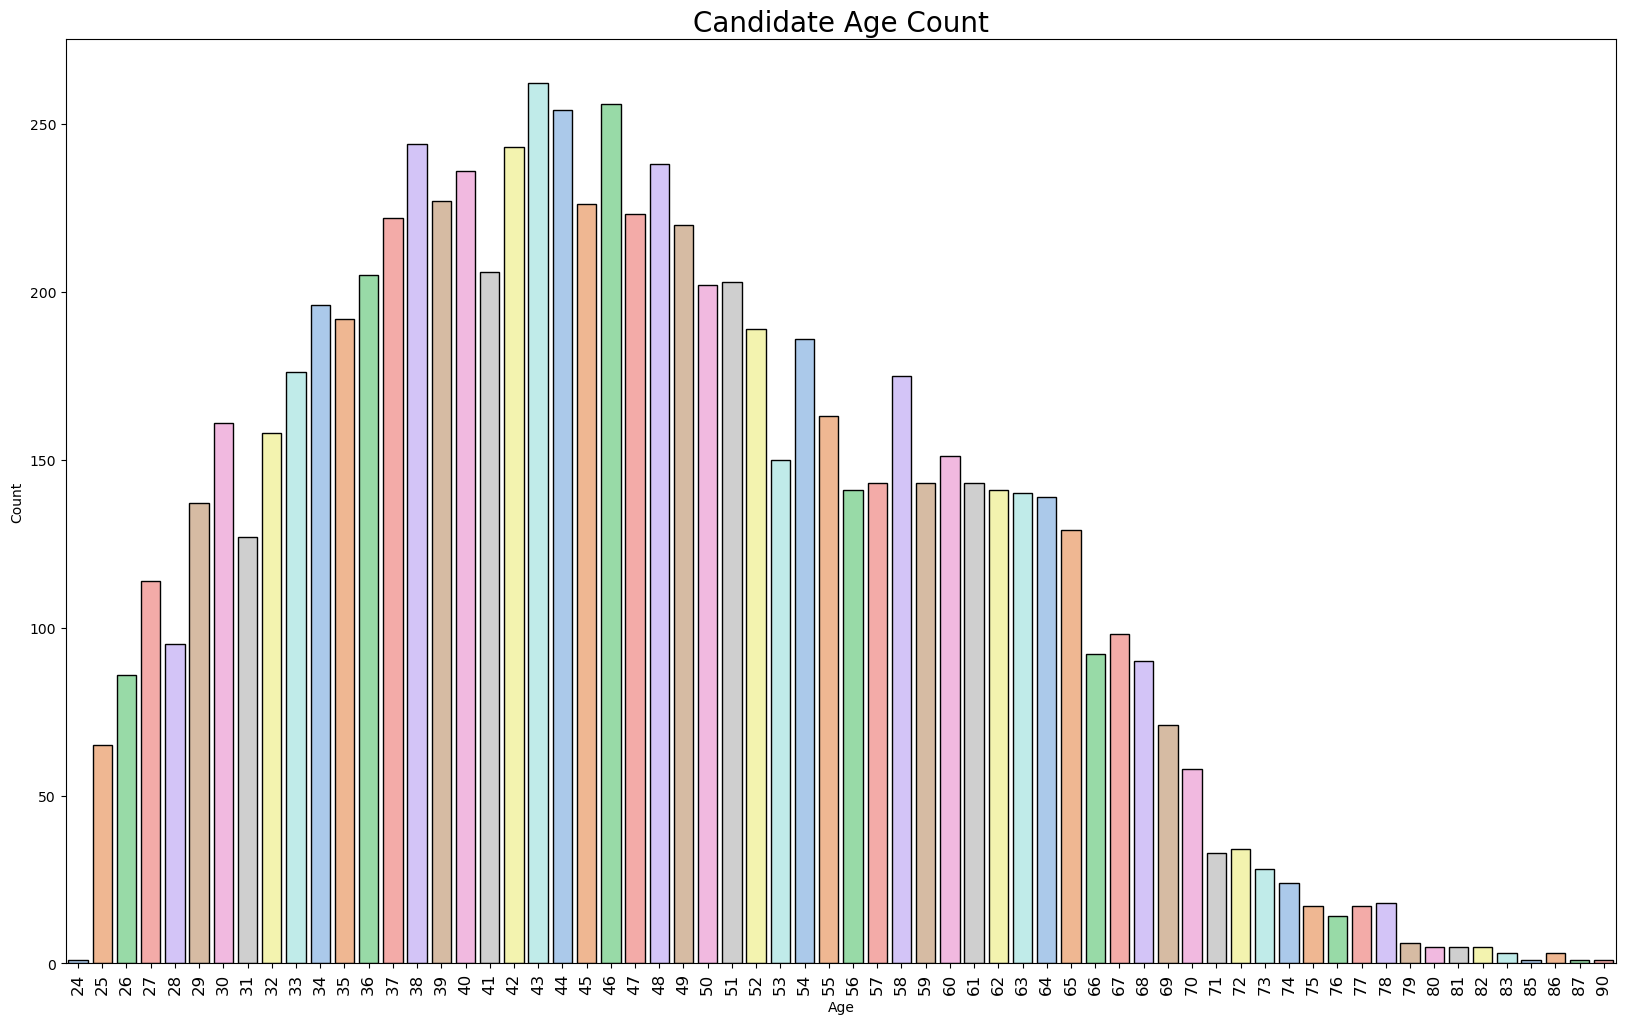

In [32]:
plt.figure(figsize=(20,12))                                          # Creates a large figure
sns.countplot(x=candidate_age_2019['Age'].sort_values(),
palette="pastel", edgecolor=(0, 0, 0), hue=None)
plt.title("Candidate Age Count", fontsize=20)                        # Sets the title
plt.xlabel('Age')                                                    # Adds a label for the x-axis
plt.ylabel('Count')                                                  # Adds a label for the y-axis
plt.xticks(fontsize=12, rotation=90)                                 # Rotates x-axis labels
plt.show()                                                           # Displays the plot

####  Most Candidates: The majority of candidates were aged 35 to 50, with the highest number around 40–45 years old.
#### Younger Participation: Fewer candidates were below 30 years old, indicating less participation from younger people.
#### Older Participation: After 60 years, the number of candidates sharply decreases, with very few participants above 70 years.


### 2. Candidate with Highest number of Criminal Cases.

In [33]:
candidates_2004['Criminal Cases'].max()

36

In [34]:
candidates_2004[candidates_2004['Criminal Cases'] == candidates_2004['Criminal Cases'].max()].head()

,Candidate,Party,Criminal Cases,Education,Age,Total Assets,Constituency,Liabilities,Winner,Gender,Year
3144,Atique Ahamad,SP,36,8th Pass,41,33704071.0,Phulpur,0,0,M,2004


In [35]:
candidates_2009[candidates_2009['Criminal Cases'] == candidates_2009['Criminal Cases'].max()].head()

,Candidate,Party,Criminal Cases,Education,Age,Total Assets,Constituency,Liabilities,Winner,Gender,Year
2427,Kameshwar Baitha,JMM,46,10th Pass,56,570000.0,Palamau,0,0,M,2009


In [36]:
candidates_2014[candidates_2014['Criminal Cases'] == candidates_2014['Criminal Cases'].max()].head()

,Candidate,Party,Criminal Cases,Education,Age,Total Assets,Constituency,Liabilities,Winner,Gender,Year
5714,Udayakumar S.P.,AAP,382,Doctorate,54,52080000.0,KANNIYAKUMARI,297000,0.0,M,2014


In [37]:
candidates_2019[candidates_2019['Criminal Cases'] == candidates_2019['Criminal Cases'].max()].head()

,Candidate,Party,Criminal Cases,Education,Age,Total Assets,Constituency,Liabilities,Winner,Gender,Year
2908,K Surendran,BJP,240,Graduate,49,4044300.0,Pathanamthitta,1308799,0.0,M,2019


In [38]:
candidates.sort_values(by = 'Criminal Cases', ascending=False).head()


,Candidate,Party,Criminal Cases,Education,Age,Total Assets,Constituency,Liabilities,Winner,Gender,Year
5714,Udayakumar S.P.,AAP,382,Doctorate,54,52080000.0,KANNIYAKUMARI,297000,0.0,M,2014
6056,M.Pushparayan,AAP,380,Post Graduate,46,8775806.0,THOOTHUKKUDI,0,0.0,M,2014
2908,K Surendran,BJP,240,Graduate,49,4044300.0,Pathanamthitta,1308799,0.0,M,2019
2818,Dean Kuriakose,INC,204,Post Graduate,37,13395011.0,Idukki,10000000,0.0,M,2019
7432,Ateek Ahmad,IND,59,8th Pass,54,255020529.0,Varanasi,0,0.0,M,2019


In [39]:
candidates.sort_values(['Criminal Cases'],ascending=False).head().style.background_gradient(subset = ['Criminal Cases'], cmap = 'YlGn')


,Candidate,Party,Criminal Cases,Education,Age,Total Assets,Constituency,Liabilities,Winner,Gender,Year
5714,Udayakumar S.P.,AAP,382,Doctorate,54,52080000.000000,KANNIYAKUMARI,297000,0.000000,M,2014
6056,M.Pushparayan,AAP,380,Post Graduate,46,8775806.000000,THOOTHUKKUDI,0,0.000000,M,2014
2908,K Surendran,BJP,240,Graduate,49,4044300.000000,Pathanamthitta,1308799,0.000000,M,2019
2818,Dean Kuriakose,INC,204,Post Graduate,37,13395011.000000,Idukki,10000000,0.000000,M,2019
7432,Ateek Ahmad,IND,59,8th Pass,54,255020529.000000,Varanasi,0,0.000000,M,2019


### Candidate Udayakumar S.p. has highest numberof criminal cases which are 382.


In [46]:
party_criminal_cases = candidates.groupby('Party')['Criminal Cases'].sum().reset_index()

In [47]:
party_criminal_cases_sorted = party_criminal_cases.sort_values(by='Criminal Cases', ascending=False)


### Parties with total number of criminal cases

In [50]:
party_criminal_cases_sorted.head()

,Party,Criminal Cases
479,IND,2601
186,BJP,1839
478,INC,1439
1,AAP,928
224,BSP,922


### 3.Number of candidate participated from each Party since 2004.

C:\Users\admin\AppData\Local\Temp\ipykernel_11232\2447451609.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


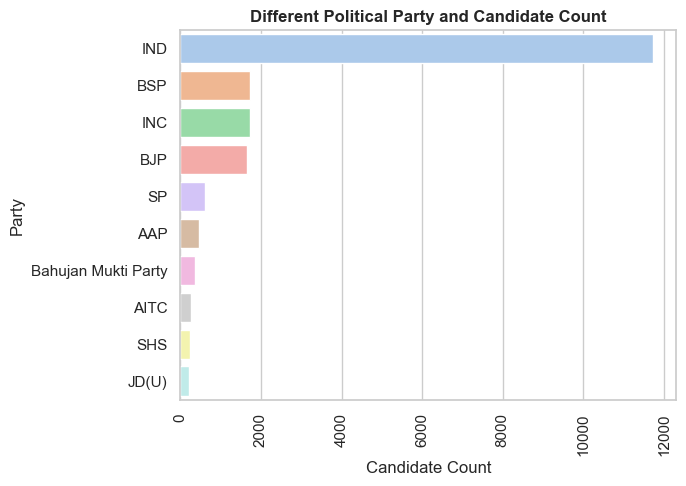

In [41]:

loc =candidates["Party"].value_counts()
sns.set(style="whitegrid")
sns.barplot(
    x=loc[:10],
    y=loc[:10].index,
    palette="pastel"
)
plt.xticks(rotation=90)
plt.ylabel('Party')
plt.xlabel('Candidate Count')
plt.title("Different Political Party and Candidate Count", fontweight="bold")
plt.show()


### 4.Education of each candidate.


In [58]:
candidates[['Candidate','Education']].head(10)

,Candidate,Education
0,Shri Bishnu Pada Ray,Graduate
1,Shri P. R. Ganeshan,Not Given
2,Shri Pradeep Kumar Ekka,Others
3,Shri T. Ali,12th Pass
4,Shri Tapan Kumar Bepari,Post Graduate
5,Shri Vakiath Valappil Khalid,8th Pass
6,Shri. Kuldeep Rai Sharma,Graduate Professional
7,Shri. M. S. Mohan,10th Pass
8,Shri. N. K. P. Nair,10th Pass
9,Smti. R. S. Uma Bharathy,Graduate


In [42]:
candidates['Education'].value_counts() 

Education
Graduate                 5305
Post Graduate            4606
10th Pass                4082
12th Pass                3773
Graduate Professional    2715
8th Pass                 2150
Not Given                1276
Literate                 1181
5th Pass                 1167
Others                    709
Doctorate                 672
Illiterate                378
Name: count, dtype: int64

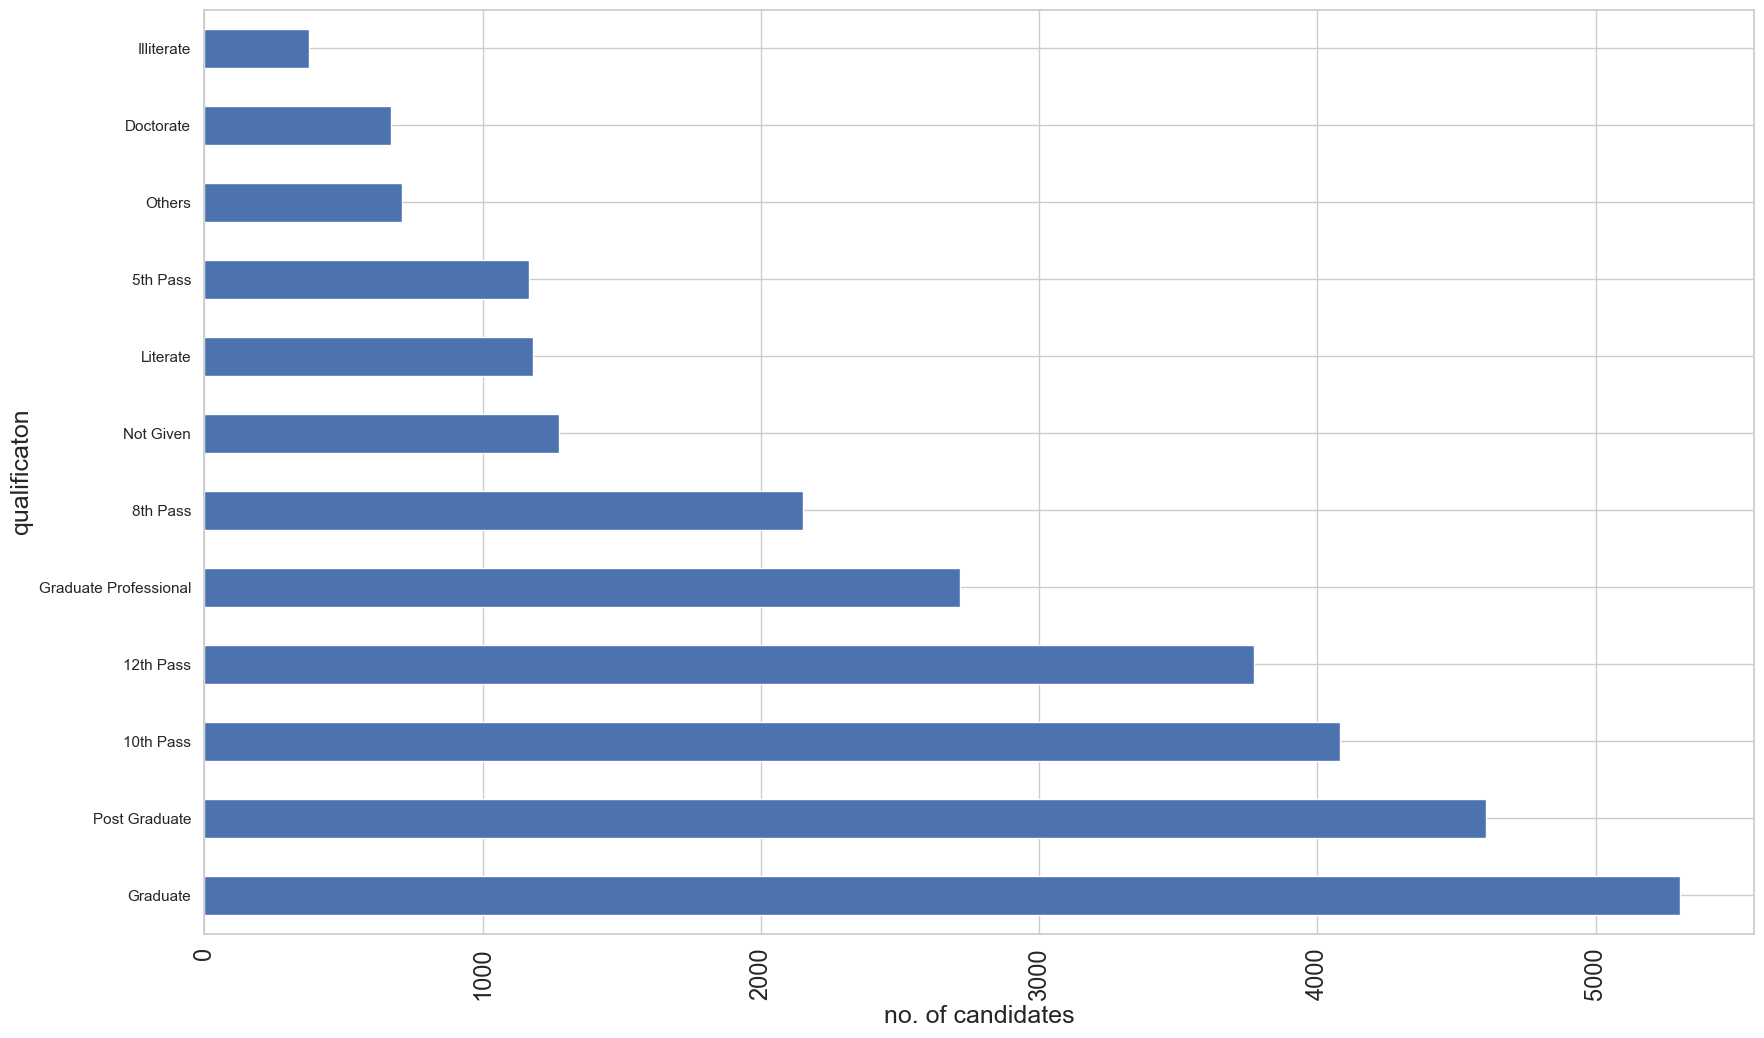

In [43]:
candidates['Education'].value_counts().plot(kind='barh',figsize=(20,12))
plt.xlabel("no. of candidates",fontsize =18)
plt.ylabel("qualificaton", fontsize =18)
plt.xticks(fontsize=17,rotation=90)
plt.show()


## Most comman education level is Graduation.

C:\Users\admin\AppData\Local\Temp\ipykernel_11232\1293168691.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(candidates['Education'].sort_values(), palette ="pastel", edgecolor=(0,0,0))


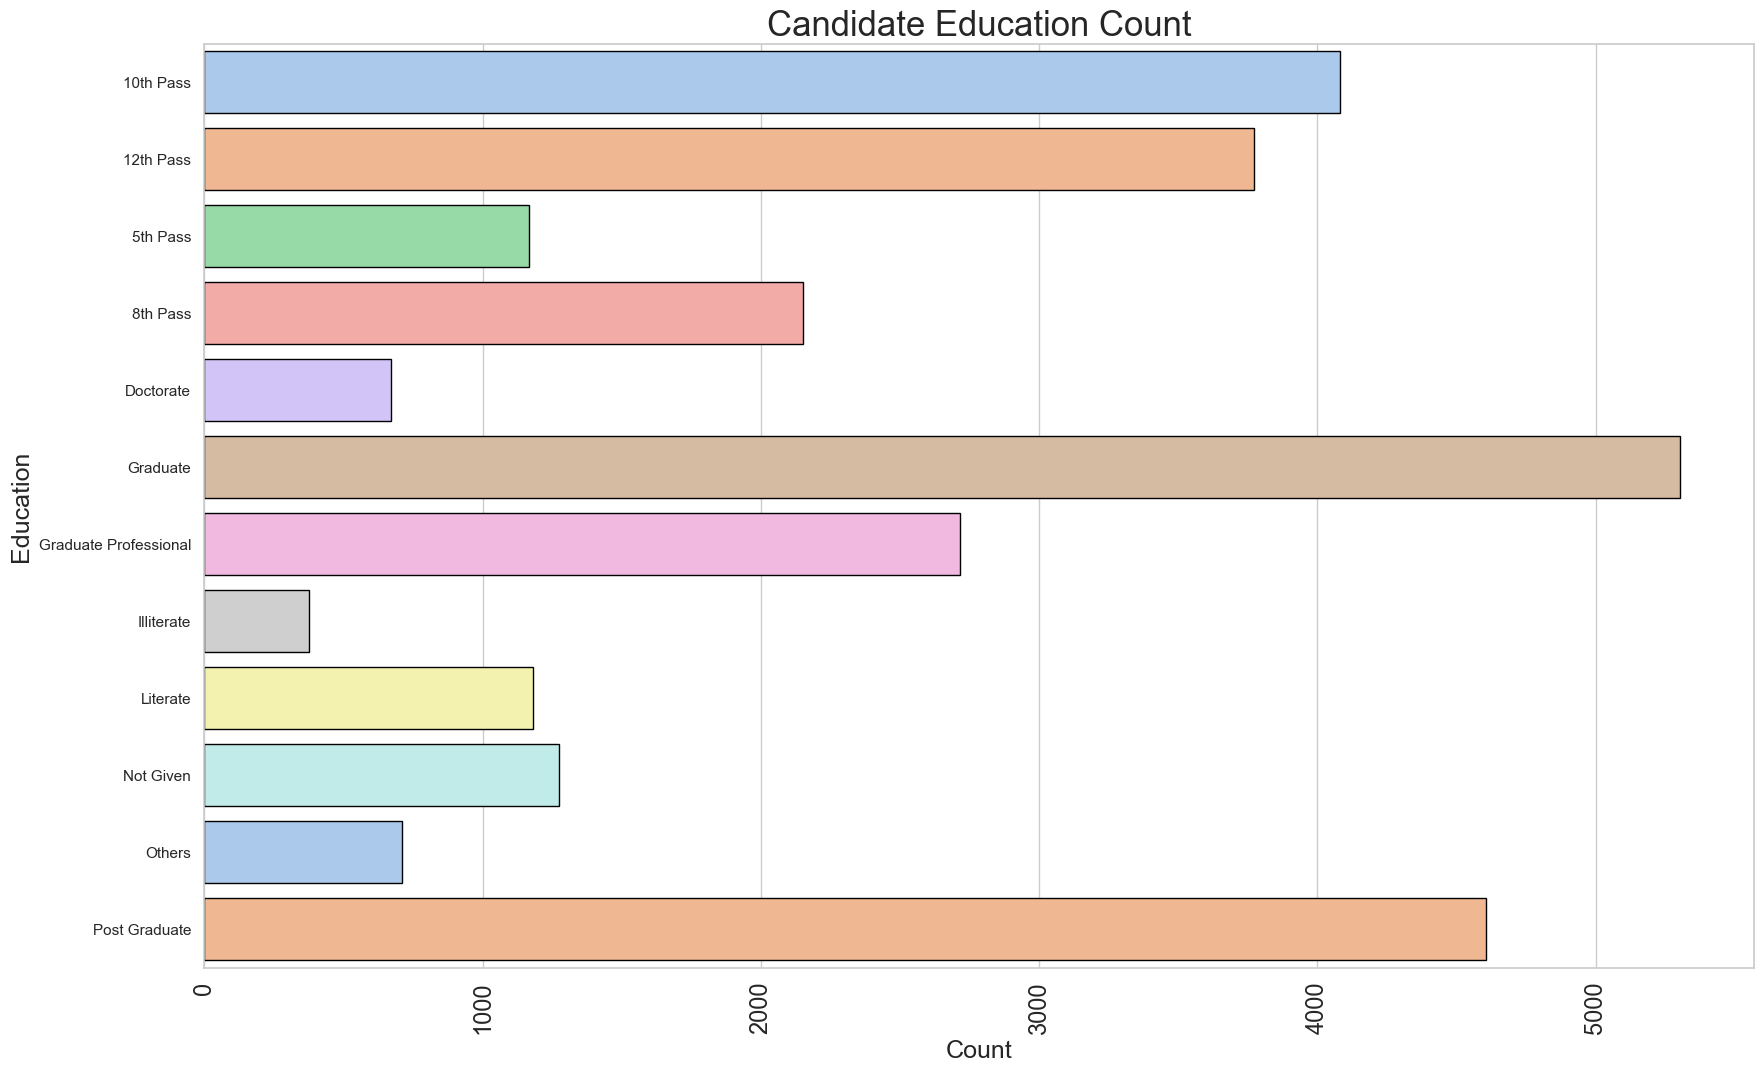

In [44]:
plt.figure(figsize=(20,12))
sns.countplot(candidates['Education'].sort_values(), palette ="pastel", edgecolor=(0,0,0)) 
plt.title("Candidate Education Count",fontsize=25)
plt.ylabel('Education', fontsize =18)
plt.xlabel('Count', fontsize =18)
plt.xticks(fontsize=17,rotation=90)
plt.show()


## 5.Different Constituency and Criminal cases count in 2014 Elections.

In [59]:
constituency_criminal_cases = candidates_2014.groupby('Constituency')['Criminal Cases'].sum().reset_index()

In [60]:
constituency_criminal_cases_sorted = constituency_criminal_cases.sort_values(by='Criminal Cases', ascending=False)

In [61]:
constituency_criminal_cases_sorted.head()

,Constituency,Criminal Cases
278,KANNIYAKUMARI,403
526,THOOTHUKKUDI,391
428,PHULPUR : BYE ELECTION ON 11-03-2018,61
413,PALAMAU,60
228,HOWRAH,59
